# A simple linear regression model to predict UK house prices using the dataset from 2015 to 2024.

In [236]:
# UK house pricing prediction using Linear Regression
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [237]:
#loading the dataset
df = pd.read_csv('/Users/dml/Documents/Project/UKHousePrice/data/UK_House_Price_Prediction_dataset_2015_to_2024.csv')
df.head(10)


,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
0,735000,2017-08-07,LE17 5AP,D,N,F,CLAYBROOKE COURT,CLAYBROOKE PARVA,LUTTERWORTH,HARBOROUGH,LEICESTERSHIRE
1,160000,2023-02-03,SA11 4BD,T,N,F,GORED COTTAGES,MELINCOURT,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
2,176500,2015-01-06,ME3 0DQ,S,N,F,GREEN LANE,ISLE OF GRAIN,ROCHESTER,MEDWAY,MEDWAY
3,625000,2021-10-13,RH20 3EU,D,N,F,LINFIELD COPSE,THAKEHAM,PULBOROUGH,HORSHAM,WEST SUSSEX
4,202000,2019-09-27,SN13 8EN,S,N,F,CLYDESDALE ROAD,BOX,CORSHAM,WILTSHIRE,WILTSHIRE
5,249950,2019-09-06,LS12 5FA,S,Y,F,FARNLEY PARK VIEW,FARNLEY,LEEDS,LEEDS,WEST YORKSHIRE
6,730000,2018-11-16,BA1 9AU,D,Y,F,BECKFORD DRIVE,LANSDOWN,BATH,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET
7,185000,2023-12-18,NR10 5PB,S,N,F,NELSON WAY,HEVINGHAM,NORWICH,BROADLAND,NORFOLK
8,120000,2021-11-10,WS12 1DN,T,N,L,WELLINGTON MEWS,HEDNESFORD,CANNOCK,CANNOCK CHASE,STAFFORDSHIRE
9,124000,2017-12-08,HU12 8BZ,T,N,F,WESTLANDS CLOSE,HEDON,HULL,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE


In [238]:
#select a unique sample of the property type
df['property_type'].unique()

array(['D', 'T', 'S', 'O', 'F'], dtype=object)

In [239]:
#select the propety type with 'O'
df[df['property_type'] == 'O'].sample()

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
72248,31500,2023-12-14,NR29 4HZ,O,N,L,BEACH ROAD,HEMSBY,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK


In [240]:
#an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          90000 non-null  int64 
 1   date           90000 non-null  object
 2   postcode       90000 non-null  object
 3   property_type  90000 non-null  object
 4   new_build      90000 non-null  object
 5   freehold       90000 non-null  object
 6   street         90000 non-null  object
 7   locality       90000 non-null  object
 8   town           90000 non-null  object
 9   district       90000 non-null  object
 10  county         90000 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.6+ MB


In [241]:
#checking for null values in the dataset
df.isnull().sum()

price            0
date             0
postcode         0
property_type    0
new_build        0
freehold         0
street           0
locality         0
town             0
district         0
county           0
dtype: int64

In [242]:
#converting the date column to datetime format and extracting the year

df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df['date'] = df['date'].dt.year

In [243]:
#ensuring the date column is in the correct format
df.sample()

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
36572,137500,2021,CB9 7HY,S,N,F,POUND GREEN,LITTLE THURLOW,HAVERHILL,WEST SUFFOLK,SUFFOLK


In [244]:
#checking the column names for the dataset
df.columns

Index(['price', 'date', 'postcode', 'property_type', 'new_build', 'freehold',
       'street', 'locality', 'town', 'district', 'county'],
      dtype='object')

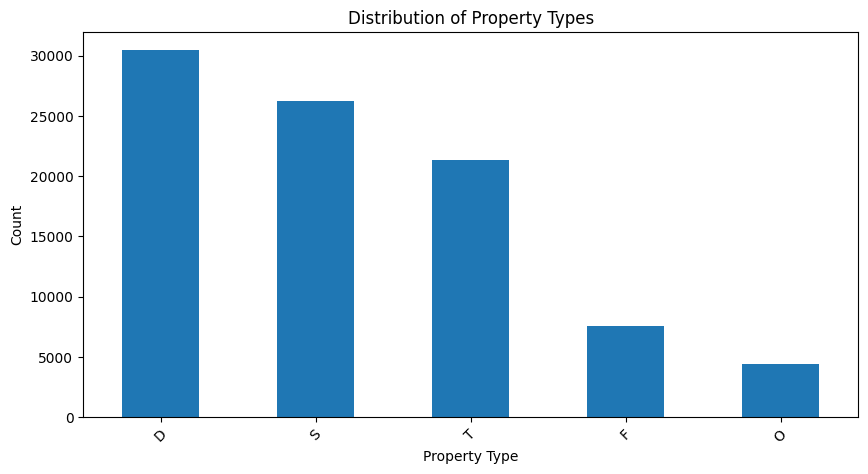

In [245]:
#plot the bar chart of the property type 'O'
df['property_type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.show()



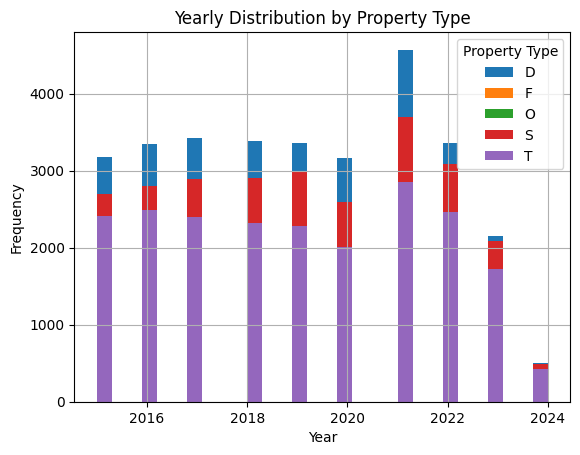

In [246]:
df.groupby('property_type')['date'].hist(legend = True, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution by Property Type')
plt.legend(title='Property Type')
plt.show()

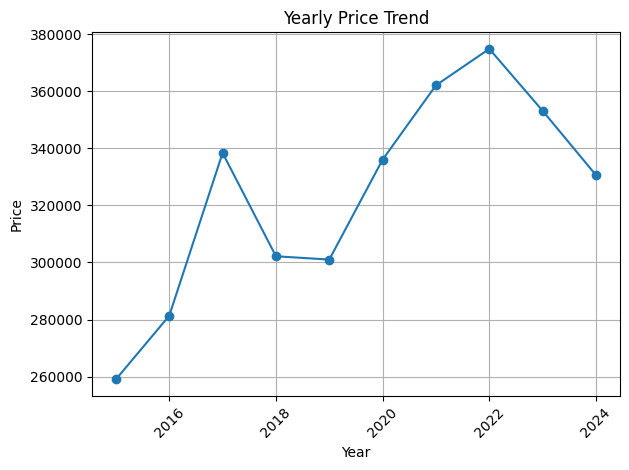

In [247]:
df_grouped = df.groupby('date')['price'].mean().reset_index()
plt.plot(df_grouped['date'], df_grouped['price'], marker='o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Price Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [248]:
#categorize the data into numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['price', 'date'], dtype='object')

In [252]:
#dropping the columns that are not needed for the analysis
df.drop(['postcode', 'locality', 'district', 'street', 'town'], axis=1, inplace=True)
df.head(5)

,price,date,property_type,new_build,freehold,county
0,735000,2017,D,N,F,LEICESTERSHIRE
1,160000,2023,T,N,F,NEATH PORT TALBOT
2,176500,2015,S,N,F,MEDWAY
3,625000,2021,D,N,F,WEST SUSSEX
4,202000,2019,S,N,F,WILTSHIRE


In [254]:
#encoding the categorical columns using le from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['property_type', 'new_build', 'freehold', 'county']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [255]:
#using price as the target variable and the rest as features
X = df.drop('price', axis=1)
y = df['price']

In [259]:
X.sample()

,date,property_type,new_build,freehold,county
10802,2022,3,0,1,41


In [268]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [269]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72000, 5), (18000, 5), (72000,), (18000,))

In [ ]:
python
from sklearn.linear_model import LinearRegression

In [277]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [278]:
y_pred = lin_reg.predict(X_test)

In [279]:
#calculating the evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1498809736850.8098
Root Mean Squared Error: 1224258.852061446
R2 Score: 0.0066823340706433365
Mean Absolute Error: 170432.3467784772
